# Linear Regression from scratch

In [1]:
from __future__ import print_function
import mxnet as mx
from mxnet import nd, autograd, gluon
mx.random.seed(1)

In [2]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()

In [3]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

X = nd.random_normal(shape=(num_examples, num_inputs), ctx=data_ctx)
noise = .1 * nd.random_normal(shape=(num_examples,), ctx=data_ctx)
y = real_fn(X) + noise

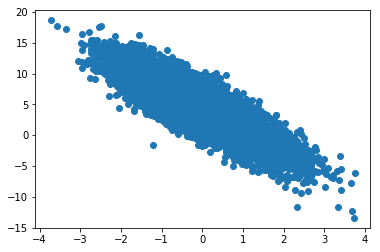

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 1].asnumpy(),y.asnumpy())
plt.show()

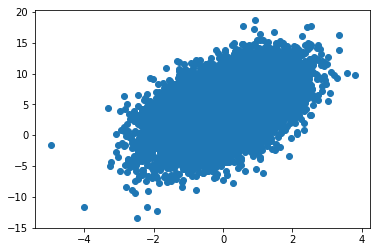

In [12]:
plt.scatter(X[:, 0].asnumpy(),y.asnumpy())
plt.show()

### Data iterators

In [27]:
## DataLoader로 데이터셋을 땡겨옴(배치 단위로 쪼개서)
batch_size = 4
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y),
                                      batch_size=batch_size, shuffle=True)

In [28]:
## 데이터 확인
for i, (data, label) in enumerate(train_data):
    print(data, label)
    break


[[-1.16347671  0.77165681]
 [ 0.94388318  0.43586433]
 [ 0.57442832 -0.20579059]
 [-0.40127996  1.98627341]]
<NDArray 4x2 @cpu(0)> 
[-0.88428789  4.533957    6.04509068 -3.34845948]
<NDArray 4 @cpu(0)>


In [30]:
## 랜덤한 초기 파라미터 셋팅
w = nd.random_normal(shape=(num_inputs, num_outputs), ctx=model_ctx)
b = nd.random_normal(shape=num_outputs, ctx=model_ctx)
params = [w, b]

In [32]:
## 각 파라미터에 grad 붙임
for param in params:
    param.attach_grad()

In [38]:
## 네트워크 구조 형성
def net(X):
    return mx.nd.dot(X, w) + b

In [33]:
## Loss Function 설정
def square_loss(yhat, y):
    return nd.mean((yhat - y) ** 2)

In [34]:
## Optimizer 설정
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

In [47]:
## Training
epochs = 10
learning_rate = 0.0001
num_batches = num_examples/batch_size

for e in range(epochs):
    cumulative_loss = 0
    #inner loop
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx).reshape((-1, 1))
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        cumulative_loss += loss.asscalar()
    print(cumulative_loss / num_bathces)

7.77138255584
2.85261212778
1.05109360656
0.391218622096
0.149556326991
0.0610888080555
0.0286953754012
0.0168168168249
0.0124751177715
0.0108827836075


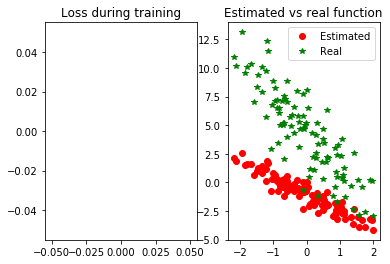

Epoch 0, batch 2499. Mean loss: 20.8358012821
Epoch 1, batch 2499. Mean loss: 7.6617206708
Epoch 2, batch 2499. Mean loss: 2.82140117397
Epoch 3, batch 2499. Mean loss: 1.04302850792
Epoch 4, batch 2499. Mean loss: 0.389583563501
Epoch 5, batch 2499. Mean loss: 0.149479607613
Epoch 6, batch 2499. Mean loss: 0.0612247227334
Epoch 7, batch 2499. Mean loss: 0.0287973587227
Epoch 8, batch 2499. Mean loss: 0.0168723595546
Epoch 9, batch 2499. Mean loss: 0.0124890102101


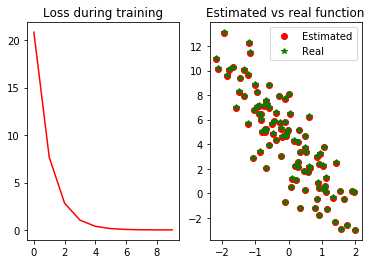

In [48]:
## 학습 과정 시각화하기
# 파라미터 임의로 초기화
w[:] = nd.random_normal(shape = (num_inputs, num_outputs), ctx = model_ctx)
b[:] = nd.random_normal(shape = num_outputs, ctx = model_ctx)

# loss 시각화
def plot(losses, X, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(X[:sample_size, 1].asnumpy(),
             net(X[:sample_size, :]).asnumpy(), 'or', label='Estimated')
    fg2.plot(X[:sample_size, 1].asnumpy(),
             real_fn(X[:sample_size, :]).asnumpy(), '*g', label='Real')
    fg2.legend()

    plt.show()

learning_rate = 0.0001
losses = []
plot(losses, X)

for e in range(epochs):
    cumulative_loss = 0
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx).reshape((-1, 1))
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        cumulative_loss += loss.asscalar()

    print("Epoch %s, batch %s. Mean loss: %s" % (e, i, cumulative_loss/num_batches))
    losses.append(cumulative_loss/num_batches)
    
plot(losses, X)
